<a href="https://colab.research.google.com/github/narrasriram/EMOTION-RECOGNITION-USING-FINE-TUNED-MODELS-ERFM-/blob/main/Colab%20Model%20building%20Files/Regression/Models%20on%20ISEAR%20Dataset/Fine-tuning%20ALBERT/Fine_tuning_Albert_for_Regression_Analysis_ISEAR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
# -*- coding: utf-8 -*-

# Author: Sriram Narra
# Course: CS 842
# Date: Apr 15, 2021
# Project Name: Emotion Recognition using Fine-tuned Models(ERFM)
# Description: This notebook builds a Fine-tuned ALBERT Model on ISEAR 
#              Dataset and checks the performance of the 
#              model with various model evaluation metrics
# --------------------------------------------------------------------------------

In [ ]:
!pip install transformers==3.1.0

     |████████████████████████████████| 890kB 6.4MB/s 
     |████████████████████████████████| 3.0MB 22.8MB/s 
     |████████████████████████████████| 1.2MB 33.7MB/s 
     |████████████████████████████████| 870kB 46.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=e3ece67c306f167246374f1a505577bf831dd5a7cc9604fe9428fbb967e5ffdb
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


Import the libraries

In [ ]:
from transformers import AlbertTokenizer
from transformers import TFAlbertForSequenceClassification

import tensorflow as tf
import json

from pandas import DataFrame
import textblob
from textblob import TextBlob
import pandas as pd

Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Load the CSV file into the dataframe

In [ ]:
data_frame=pd.read_csv('/content/drive/MyDrive/Data Science Project/Datasets/ISEAR/Isear.csv')
data_frame.head()

,Emotion,Text
0,anger,When a boy tried to fool me so he would be OK ...
1,anger,I felt anger when I saw that I was being misle...
2,anger,Once a friend had pushed me and I had fallen o...
3,anger,When I was misleaded by a person who assured t...
4,anger,I don't use to lie to my parets about what I d...


Label Encode the Emotion Label Values 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['Emotion'] = le.fit_transform(data_frame['Emotion'])
data_frame.head()

,Emotion,Text
0,0,When a boy tried to fool me so he would be OK ...
1,0,I felt anger when I saw that I was being misle...
2,0,Once a friend had pushed me and I had fallen o...
3,0,When I was misleaded by a person who assured t...
4,0,I don't use to lie to my parets about what I d...


In [ ]:
data_frame.Emotion.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
list(le.inverse_transform([0,1,2,3,4,5,6]))

['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']

Shuffle the dataframe

In [ ]:
data_frame = data_frame.sample(frac=1).reset_index(drop=True)
data_frame.head()

,Emotion,Text
0,6,I had promised to contact a friend about a par...
1,6,This morning I spent a lot of time on my toile...
2,5,When I learnt that I had been betrayed by my f...
3,5,Not doing well in an examn.
4,3,When my grandfather was in a nursing home when...


In [ ]:
data_frame.isnull().values.any()

False

Subjectivity Score Assignment

In [ ]:
from textblob import TextBlob

def getScore(data):
  return TextBlob(data).sentiment.subjectivity

data_frame["Subj_Score"] = data_frame["Text"].apply(getScore)
data_frame.head()

,Emotion,Text,Subj_Score
0,6,I had promised to contact a friend about a par...,0.468254
1,6,This morning I spent a lot of time on my toile...,0.164286
2,5,When I learnt that I had been betrayed by my f...,0.000000
3,5,Not doing well in an examn.,0.000000
4,3,When my grandfather was in a nursing home when...,0.466667


In [ ]:
len(data_frame)

7666

Check the length of Text Values containing "[ No response.]"

In [ ]:
len(data_frame[data_frame.Text=='[ No response.]'])

77

Remove those Records from dataframe

In [ ]:
data_frame.drop(data_frame[data_frame.Text=='[ No response.]'].index, inplace = True)
print("Total number of records containing the value [ No response.] after deletion is: "
                              +str(len(data_frame[data_frame.Text=='[ No response.]'])))

Total number of records containing the value [ No response.] after deletion is: 0


Outlier Analysis

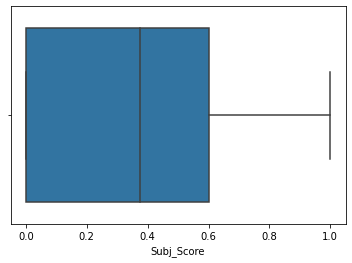

In [ ]:
import seaborn as sns
sns.boxplot(x=data_frame['Subj_Score'])

Balanced/Imbalanced Data check on Subjectivity Score Bins

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbd89b9b50>]],
      dtype=object)

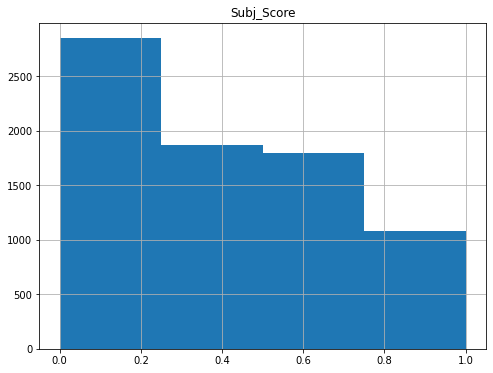

In [ ]:
data_frame.hist(column=['Subj_Score'],bins=4, figsize=(8,6))

In [ ]:
data_frame[data_frame.Subj_Score==0.000]

,Emotion,Text,Subj_Score
2,5,When I learnt that I had been betrayed by my f...,0.0
3,5,Not doing well in an examn.,0.0
5,3,My friend did not do well in the examn because...,0.0
6,1,I felt it today when the bus driver shouted ra...,0.0
7,1,"When I had to eat scraps from a dust-bin, beca...",0.0
...,...,...,...
7640,6,As a child when I was blamed for peeing in the...,0.0
7645,2,When I get into the tube or the train without ...,0.0
7650,3,Sleeping through crew practice one Monday morn...,0.0
7651,6,"When I was a child, I had a medical check-up. ...",0.0


In [ ]:
data_frame.describe()

,Emotion,Subj_Score
count,7589.000000,7589.000000
mean,2.995125,0.374595
std,1.998775,0.315862
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.375000
75%,5.000000,0.600000
max,6.000000,1.000000


In [ ]:
len(data_frame)

7589

Balancing maximum bins in the Imbalanced Dataset based on Subjectivity Score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbd89f5250>]],
      dtype=object)

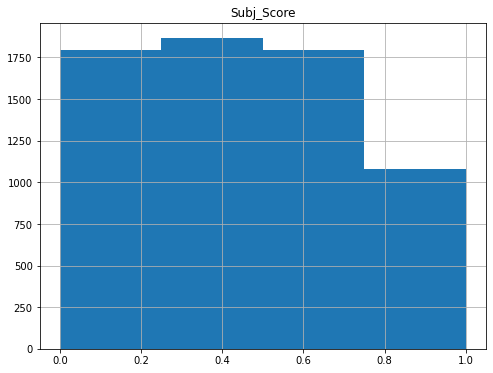

In [ ]:
count = 1
columns = ['Emotion', 'Text', 'Subj_Score']
zero_list = []
for ind, row in data_frame.iterrows():
  if(row['Subj_Score']==0.0 and count<=1000):
    zero_list.append(row.to_dict())
    count+=1
zero_df = pd.DataFrame(zero_list)
cond = data_frame['Text'].isin(zero_df['Text'])
data_frame.drop(data_frame[cond].index, inplace = True)
data_frame.hist(column=['Subj_Score'],bins=4, figsize=(8,6))

In [ ]:
len(data_frame[data_frame.Subj_Score==0.0])

1086

In [ ]:
len(data_frame)

6538

Balanced/Imbalanced Analysis of the Dataset

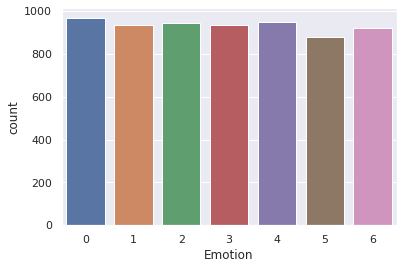

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Emotion", data=data_frame)

Conversion of dataframe column data into list

In [ ]:
sentences_list = data_frame['Text'].tolist()
labels_list = data_frame['Subj_Score'].tolist()

Splitting the training, validation and testing data

In [ ]:
train_length = int(0.7*len(data_frame))
validation_length = int(0.7*len(data_frame))+int(0.15*len(data_frame))

train_data = sentences_list[0:train_length]
val_data = sentences_list[train_length:validation_length]
test_data = sentences_list[validation_length:]
extended_data = zero_df['Text'].tolist()
test_data.extend(extended_data)
train_scores = labels_list[0:train_length]
val_scores = labels_list[train_length:validation_length]
test_scores = labels_list[validation_length:]
extended_scores = zero_df['Subj_Score'].tolist()
test_scores.extend(extended_scores)

In [ ]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

4576
980
1982


Initializing the AlbertTokenizer instance

In [ ]:
albert_tokens = AlbertTokenizer.from_pretrained('albert-base-v2')

5-fold Cross Validation

In [ ]:
# kfold
from sklearn.model_selection import KFold
kf= KFold(n_splits=5, random_state=None, shuffle=True)
fold_no = 1
losses_array = []
validation_losses_array = []
mse_array = []
validation_mse_array = []
for train_index_list, test_index_list in kf.split(sentences_list):
  x_train_n = [sentences_list[index] for index in train_index_list]
  x_test_n = [sentences_list[index] for index in test_index_list]
  y_train_n = [labels_list[index] for index in train_index_list]
  y_test_n = [labels_list[index] for index in test_index_list]

  #do all the things
  train_tokens_n = albert_tokens(x_train_n,
                            truncation=True,
                            padding=True)
  validation_tokens_n = albert_tokens(x_test_n,
                            truncation=True,
                            padding=True)
  
  model_train_data = tf.data.Dataset.from_tensor_slices((
    dict(train_tokens_n),
    y_train_n
    ))

  model_val_data = tf.data.Dataset.from_tensor_slices((
    dict(validation_tokens_n),
    y_test_n
    ))
  
  albert_regression_model = TFAlbertForSequenceClassification.from_pretrained('albert-base-v2',
                                                              num_labels=1)
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
  albert_regression_model.compile(optimizer=optimizer, loss=albert_regression_model.compute_loss, metrics=['mean_squared_error'])

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history= albert_regression_model.fit(model_train_data.shuffle(100).batch(16),
          epochs=8,
          batch_size=16,
          validation_data=model_val_data.shuffle(100).batch(16))

  fold_no = fold_no + 1
  losses_array.append(history.history['loss'])
  validation_losses_array.append(history.history['val_loss'])
  mse_array.append(history.history['mean_squared_error'])
  validation_mse_array.append(history.history['val_mean_squared_error'])
print("K fold validaiton finished..............................")

Some weights of the model checkpoint at albert-base-v2 were not used when initializing TFAlbertForSequenceClassification: ['predictions']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier', 'dropout_5']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/8
328/328 [==============================] - 115s 307ms/step - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 2/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 3/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 4/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 5/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 6/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0087

Some weights of the model checkpoint at albert-base-v2 were not used when initializing TFAlbertForSequenceClassification: ['predictions']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier', 'dropout_11']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/8
328/328 [==============================] - 114s 308ms/step - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.0909 - val_mean_squared_error: 0.0909
Epoch 2/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 3/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 4/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 5/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 6/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0090

Some weights of the model checkpoint at albert-base-v2 were not used when initializing TFAlbertForSequenceClassification: ['predictions']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier', 'dropout_17']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/8
328/328 [==============================] - 114s 309ms/step - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 2/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 3/8
328/328 [==============================] - 99s 302ms/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 4/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 5/8
328/328 [==============================] - 99s 302ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 6/8
328/328 [==============================] - 99s 301ms/step - loss: 0.0082

Some weights of the model checkpoint at albert-base-v2 were not used when initializing TFAlbertForSequenceClassification: ['predictions']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['dropout_23', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/8
328/328 [==============================] - 107s 285ms/step - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1060 - val_mean_squared_error: 0.1060
Epoch 2/8
328/328 [==============================] - 91s 277ms/step - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.0621 - val_mean_squared_error: 0.0621
Epoch 3/8
328/328 [==============================] - 91s 277ms/step - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 4/8
328/328 [==============================] - 91s 277ms/step - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 5/8
328/328 [==============================] - 91s 276ms/step - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 6/8
328/328 [==============================] - 90s 276ms/step - loss: 0.0227

Some weights of the model checkpoint at albert-base-v2 were not used when initializing TFAlbertForSequenceClassification: ['predictions']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['dropout_29', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/8
328/328 [==============================] - 113s 307ms/step - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.0874 - val_mean_squared_error: 0.0874
Epoch 2/8
328/328 [==============================] - 98s 299ms/step - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 3/8
328/328 [==============================] - 98s 300ms/step - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 4/8
328/328 [==============================] - 98s 299ms/step - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 5/8
328/328 [==============================] - 98s 300ms/step - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.0845 - val_mean_squared_error: 0.0845
Epoch 6/8
328/328 [==============================] - 98s 300ms/step - loss: 0.0745

Plots of Traning and Validation Losses and metrics of the models of 5-fold cross validation

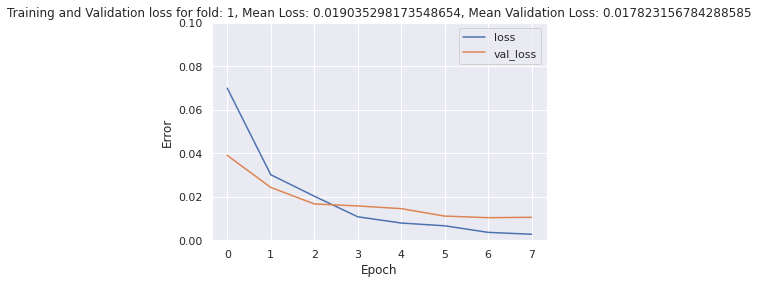

In [ ]:
import matplotlib.pyplot as plt
from statistics import mean

fold = 1

def plot_loss(fold):
  plt.plot(losses_array[fold-1], label='loss')
  plt.plot(validation_losses_array[fold-1], label='val_loss')
  plt.ylim([0, 0.1])
  plt.title('Training and Validation loss for fold: '+str(fold)+', Mean Loss: '+str(mean(losses_array[fold-1]))+', Mean Validation Loss: '+str(mean(validation_losses_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(fold)

mean_loss = []
mean_val_loss = []

mean_loss.append(mean(losses_array[fold-1]))
mean_val_loss.append(mean(validation_losses_array[fold-1]))


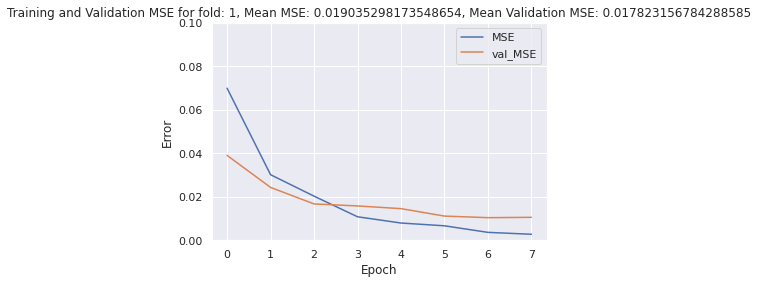

In [ ]:
def plot_mse(fold):
  plt.plot(mse_array[fold-1], label='MSE')
  plt.plot(validation_mse_array[fold-1], label='val_MSE')
  plt.ylim([0, 0.1])
  plt.title('Training and Validation MSE for fold: '+str(fold)+', Mean MSE: '+str(mean(mse_array[fold-1]))+', Mean Validation MSE: '+str(mean(validation_mse_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_mse(fold)

mean_mse = []
mean_val_mse = []

mean_mse.append(mean(mse_array[fold-1]))
mean_val_mse.append(mean(validation_mse_array[fold-1]))

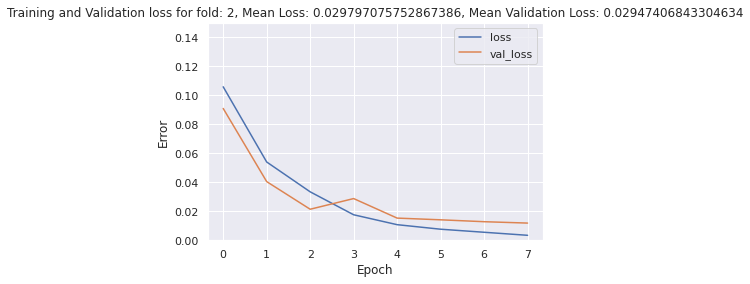

In [ ]:
fold = 2

def plot_loss(fold):
  plt.plot(losses_array[fold-1], label='loss')
  plt.plot(validation_losses_array[fold-1], label='val_loss')
  plt.ylim([0, 0.15])
  plt.title('Training and Validation loss for fold: '+str(fold)+', Mean Loss: '+str(mean(losses_array[fold-1]))+', Mean Validation Loss: '+str(mean(validation_losses_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(fold)

mean_loss.append(mean(losses_array[fold-1]))
mean_val_loss.append(mean(validation_losses_array[fold-1]))

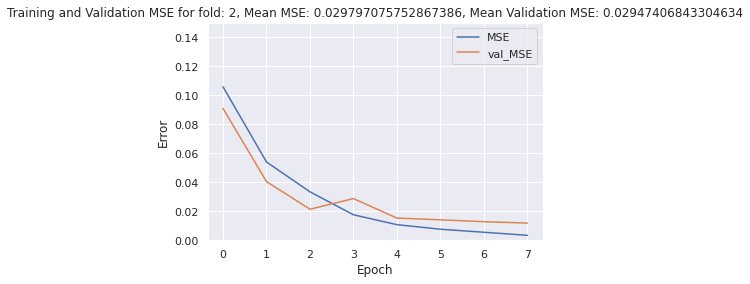

In [ ]:
def plot_mse(fold):
  plt.plot(mse_array[fold-1], label='MSE')
  plt.plot(validation_mse_array[fold-1], label='val_MSE')
  plt.ylim([0, 0.15])
  plt.title('Training and Validation MSE for fold: '+str(fold)+', Mean MSE: '+str(mean(mse_array[fold-1]))+', Mean Validation MSE: '+str(mean(validation_mse_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_mse(fold)

mean_mse.append(mean(mse_array[fold-1]))
mean_val_mse.append(mean(validation_mse_array[fold-1]))

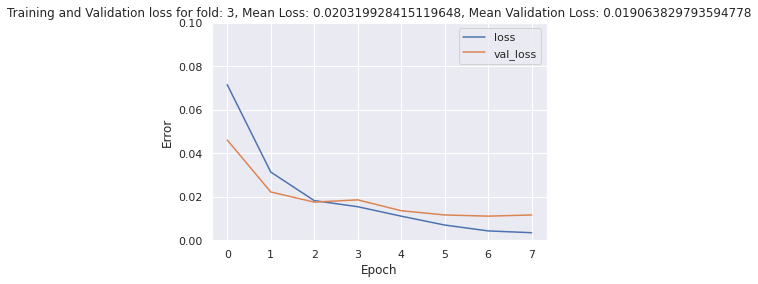

In [ ]:
fold = 3

def plot_loss(fold):
  plt.plot(losses_array[fold-1], label='loss')
  plt.plot(validation_losses_array[fold-1], label='val_loss')
  plt.ylim([0, 0.1])
  plt.title('Training and Validation loss for fold: '+str(fold)+', Mean Loss: '+str(mean(losses_array[fold-1]))+', Mean Validation Loss: '+str(mean(validation_losses_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(fold)

mean_loss.append(mean(losses_array[fold-1]))
mean_val_loss.append(mean(validation_losses_array[fold-1]))


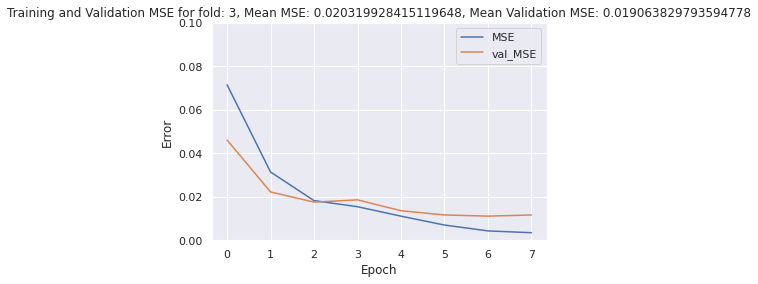

In [ ]:
def plot_mse(fold):
  plt.plot(mse_array[fold-1], label='MSE')
  plt.plot(validation_mse_array[fold-1], label='val_MSE')
  plt.ylim([0, 0.1])
  plt.title('Training and Validation MSE for fold: '+str(fold)+', Mean MSE: '+str(mean(mse_array[fold-1]))+', Mean Validation MSE: '+str(mean(validation_mse_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_mse(fold)

mean_mse.append(mean(mse_array[fold-1]))
mean_val_mse.append(mean(validation_mse_array[fold-1]))

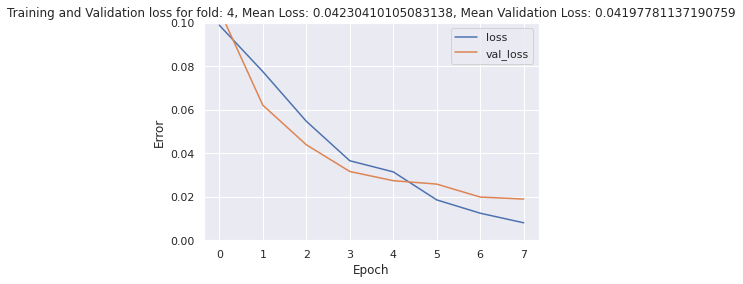

In [ ]:
fold = 4

def plot_loss(fold):
  plt.plot(losses_array[fold-1], label='loss')
  plt.plot(validation_losses_array[fold-1], label='val_loss')
  plt.ylim([0, 0.1])
  plt.title('Training and Validation loss for fold: '+str(fold)+', Mean Loss: '+str(mean(losses_array[fold-1]))+', Mean Validation Loss: '+str(mean(validation_losses_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(fold)

mean_loss.append(mean(losses_array[fold-1]))
mean_val_loss.append(mean(validation_losses_array[fold-1]))


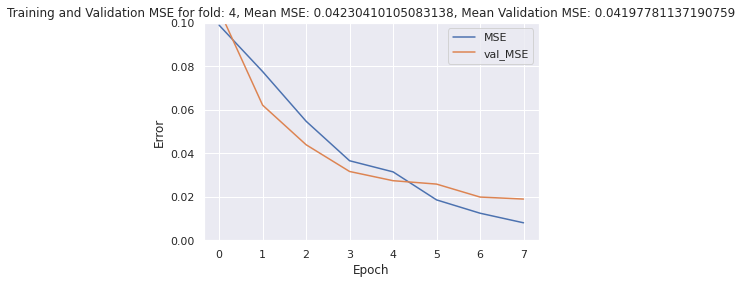

In [ ]:
def plot_mse(fold):
  plt.plot(mse_array[fold-1], label='MSE')
  plt.plot(validation_mse_array[fold-1], label='val_MSE')
  plt.ylim([0, 0.1])
  plt.title('Training and Validation MSE for fold: '+str(fold)+', Mean MSE: '+str(mean(mse_array[fold-1]))+', Mean Validation MSE: '+str(mean(validation_mse_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_mse(fold)

mean_mse.append(mean(mse_array[fold-1]))
mean_val_mse.append(mean(validation_mse_array[fold-1]))

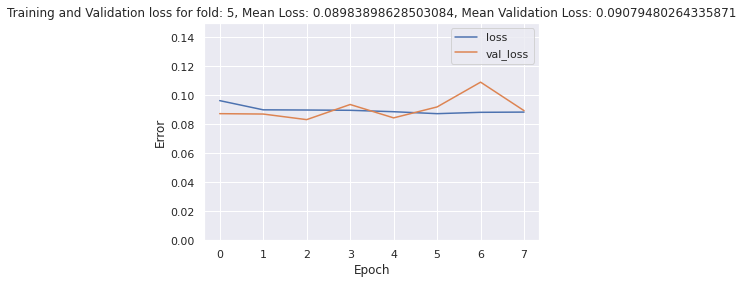

In [ ]:
fold = 5

def plot_loss(fold):
  plt.plot(losses_array[fold-1], label='loss')
  plt.plot(validation_losses_array[fold-1], label='val_loss')
  plt.ylim([0, 0.15])
  plt.title('Training and Validation loss for fold: '+str(fold)+', Mean Loss: '+str(mean(losses_array[fold-1]))+', Mean Validation Loss: '+str(mean(validation_losses_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(fold)

mean_loss.append(mean(losses_array[fold-1]))
mean_val_loss.append(mean(validation_losses_array[fold-1]))


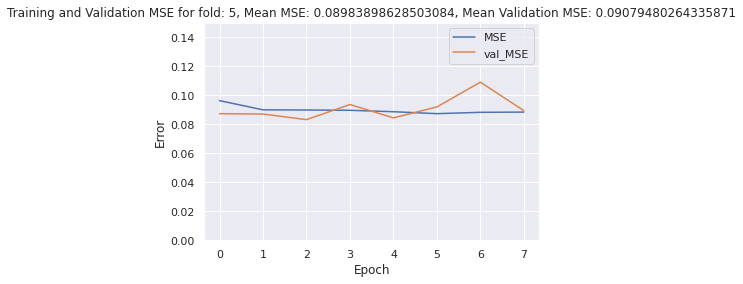

In [ ]:
def plot_mse(fold):
  plt.plot(mse_array[fold-1], label='MSE')
  plt.plot(validation_mse_array[fold-1], label='val_MSE')
  plt.ylim([0, 0.15])
  plt.title('Training and Validation MSE for fold: '+str(fold)+', Mean MSE: '+str(mean(mse_array[fold-1]))+', Mean Validation MSE: '+str(mean(validation_mse_array[fold-1])))
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_mse(fold)

mean_mse.append(mean(mse_array[fold-1]))
mean_val_mse.append(mean(validation_mse_array[fold-1]))

In [ ]:
print("Mean Training Loss for all the folds: ",mean(mean_loss))
print("Mean Validation Loss for all the folds: ",mean(mean_val_loss))
print()
print("Mean Training MSE metric for all the folds: ",mean(mean_mse))
print("Mean Validation MSE metric for all the folds: ",mean(mean_val_mse))

Mean Training Loss for all the folds:  0.04025907793547958
Mean Validation Loss for all the folds:  0.0398267338052392

Mean Training MSE metric for all the folds:  0.04025907793547958
Mean Validation MSE metric for all the folds:  0.0398267338052392


Tokenizing the Input sentences

In [ ]:
train_tokens = albert_tokens(train_data,
                            truncation=True,
                            padding=True)
validation_tokens = albert_tokens(val_data,
                            truncation=True,
                            padding=True)

In [ ]:
print(train_data[1])

This morning I spent a lot of time on my toilet and missed the á
train to the university.  My mother told me that I spent more á
time than a woman on my toilet.  I felt a mixed emotion of shame á
and anger.


In [ ]:
print(train_tokens['input_ids'][1])
#print(len(train_tokens['token_type_ids'][1]))
ids= train_tokens['input_ids'][1]

[2, 48, 959, 31, 1111, 21, 865, 16, 85, 27, 51, 9594, 17, 3238, 14, 21, 1528, 20, 14, 155, 9, 51, 449, 470, 55, 30, 31, 1111, 91, 21, 85, 119, 21, 524, 27, 51, 9594, 9, 31, 427, 21, 2198, 6691, 16, 7912, 21, 17, 3388, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
vocab_dict = albert_tokens.get_vocab()

In [ ]:
for i in ids:
  print(list(vocab_dict.keys())[list(vocab_dict.values()).index(i)])


[CLS]
▁this
▁morning
▁i
▁spent
▁a
▁lot
▁of
▁time
▁on
▁my
▁toilet
▁and
▁missed
▁the
▁a
▁train
▁to
▁the
▁university
.
▁my
▁mother
▁told
▁me
▁that
▁i
▁spent
▁more
▁a
▁time
▁than
▁a
▁woman
▁on
▁my
▁toilet
.
▁i
▁felt
▁a
▁mixed
▁emotion
▁of
▁shame
▁a
▁and
▁anger
.
[SEP]
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>
<pad>


Binding the Input tokens and Subjectiviy scores into a Tensorflow Dataset format

In [ ]:
model_train_data = tf.data.Dataset.from_tensor_slices((
    dict(train_tokens),
    train_scores
))

model_val_data = tf.data.Dataset.from_tensor_slices((
    dict(validation_tokens),
    val_scores
))

Retrieving the Pre-trained ALBERT model

In [ ]:
albert_regression_model = TFAlbertForSequenceClassification.from_pretrained('albert-base-v2',
                                                              num_labels=1)

Some weights of the model checkpoint at albert-base-v2 were not used when initializing TFAlbertForSequenceClassification: ['predictions']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier', 'dropout_35']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model Summary

In [ ]:
albert_regression_model.summary()

Model: "tf_albert_for_sequence_classification_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
albert (TFAlbertMainLayer)   multiple                  11683584  
_________________________________________________________________
dropout_35 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  769       
Total params: 11,684,353
Trainable params: 11,684,353
Non-trainable params: 0
_________________________________________________________________


Training the model with MSE metric

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
albert_regression_model.compile(optimizer=optimizer, loss=albert_regression_model.compute_loss, metrics=['mean_squared_error'])
history= albert_regression_model.fit(model_train_data.shuffle(100).batch(16),
          epochs=6,
          batch_size=16,
          validation_data=model_val_data.shuffle(100).batch(16))

Epoch 1/6
287/287 [==============================] - 100s 305ms/step - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.1027 - val_mean_squared_error: 0.1027
Epoch 2/6
287/287 [==============================] - 85s 297ms/step - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0969 - val_mean_squared_error: 0.0969
Epoch 3/6
287/287 [==============================] - 85s 296ms/step - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.1030 - val_mean_squared_error: 0.1030
Epoch 4/6
287/287 [==============================] - 85s 295ms/step - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 5/6
287/287 [==============================] - 85s 295ms/step - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 6/6
287/287 [==============================] - 85s 296ms/step - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Save the Trained Model

In [ ]:
albert_regression_model.save_pretrained("/Regression/Finetuned_Albert_model")

Mean Squared Error of the Model


In [ ]:
mean_squared_error = history.history['val_mean_squared_error'][1]
print(mean_squared_error)

0.09686160087585449


RMSE of the Model


In [ ]:
import math

root_mean_squared_error = math.sqrt(mean_squared_error)
print(root_mean_squared_error)

0.3112259643343635


Plot the Losses

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

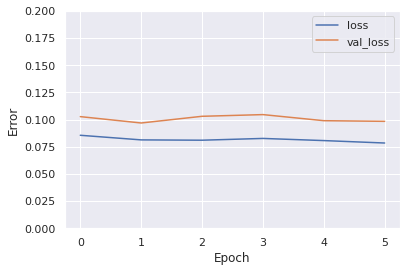

In [ ]:
plot_loss(history)

Load the Trained Model

In [ ]:
required_predictor = TFAlbertForSequenceClassification.from_pretrained("/Regression/Finetuned_Albert_model")

Some weights of the model checkpoint at /Regression/Finetuned_Albert_model were not used when initializing TFAlbertForSequenceClassification: ['dropout_35']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFAlbertForSequenceClassification were not initialized from the model checkpoint at /Regression/Finetuned_Albert_model and are newly initialized: ['dropout_41']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Getting the Test Set Predictions

In [ ]:
test_pred = []


for sent in test_data:
  test_tokens = albert_tokens.encode(sent,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

  test_pred.append(required_predictor.predict(test_tokens)[0][0][0])
print(test_pred)

[0.36347818, 0.40574205, 0.4038545, 0.4284067, 0.36519718, 0.44208518, 0.4298197, 0.39505422, 0.37027073, 0.38310638, 0.34760994, 0.37498987, 0.39537406, 0.3626685, 0.40134773, 0.356306, 0.36860698, 0.37909335, 0.39353594, 0.35419685, 0.36307144, 0.38129956, 0.37215412, 0.41859508, 0.38954997, 0.35303777, 0.35369164, 0.4365461, 0.3580075, 0.36511204, 0.38442093, 0.3670215, 0.36401904, 0.36284262, 0.36510834, 0.34600246, 0.3562532, 0.41389227, 0.3755449, 0.42703548, 0.3532312, 0.36081463, 0.3896449, 0.34762195, 0.36286557, 0.4481939, 0.41083133, 0.4251564, 0.36506543, 0.3487317, 0.38615113, 0.34916872, 0.38910598, 0.3647344, 0.37847123, 0.3887201, 0.3913115, 0.4087869, 0.4121433, 0.38591817, 0.36685523, 0.35187107, 0.36491144, 0.38329864, 0.37601423, 0.38572514, 0.382832, 0.35502148, 0.36937755, 0.42310408, 0.35381377, 0.3686177, 0.37719232, 0.42601615, 0.37173432, 0.4446918, 0.3776294, 0.39146733, 0.4490177, 0.37965733, 0.4081568, 0.3473268, 0.3559035, 0.40578926, 0.38609844, 0.3677588

MSE of Test Data

In [ ]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(test_scores, test_pred)
print(mse_test)

0.1150109167459362


MAE of Test Data

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(test_scores, test_pred)
print(mae_test)

0.31350613493182694


RMSE for Test Data

In [ ]:
root_mean_squared_error_test = math.sqrt(mse_test)
print(root_mean_squared_error_test)

0.3391325946380504


In [ ]:
test_sent = "Sun sets in the west"
test_tokens = albert_tokens.encode(sent,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")
required_predictor.predict(test_tokens)[0][0][0]

0.36349094

Train the model with Mean Absolute Error Metric

In [ ]:
albert_regression_model_mae = TFAlbertForSequenceClassification.from_pretrained('albert-base-v2',
                                                              num_labels=1)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
albert_regression_model_mae.compile(optimizer=optimizer, loss=albert_regression_model_mae.compute_loss, metrics=['mean_absolute_error'])
history= albert_regression_model_mae.fit(model_train_data.shuffle(100).batch(16),
          epochs=6,
          batch_size=16,
          validation_data=model_val_data.shuffle(100).batch(16))

Some weights of the model checkpoint at albert-base-v2 were not used when initializing TFAlbertForSequenceClassification: ['predictions']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['dropout_5', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
286/286 [==============================] - 125s 383ms/step - loss: 0.0969 - mean_absolute_error: 0.2436 - val_loss: 0.0941 - val_mean_absolute_error: 0.2549
Epoch 2/6
286/286 [==============================] - 106s 372ms/step - loss: 0.0779 - mean_absolute_error: 0.2245 - val_loss: 0.1044 - val_mean_absolute_error: 0.2655
Epoch 3/6
286/286 [==============================] - 106s 372ms/step - loss: 0.0751 - mean_absolute_error: 0.2221 - val_loss: 0.0948 - val_mean_absolute_error: 0.2576
Epoch 4/6
286/286 [==============================] - 106s 372ms/step - loss: 0.0745 - mean_absolute_error: 0.2212 - val_loss: 0.0950 - val_mean_absolute_error: 0.2586
Epoch 5/6
286/286 [==============================] - 106s 372ms/step - loss: 0.0723 - mean_absolute_error: 0.2168 - val_loss: 0.0762 - val_mean_absolute_error: 0.2297
Epoch 6/6
286/286 [==============================] - 106s 372ms/step - loss: 0.0555 - mean_absolute_error: 0.1865 - val_loss: 0.0426 - val_mean_absolute_error: 0.151

In [ ]:
mean_abs_error = history.history['val_mean_absolute_error'][1]
print(mean_abs_error)

0.2655352056026459


Plot of Training and Validation Losses for every epoch

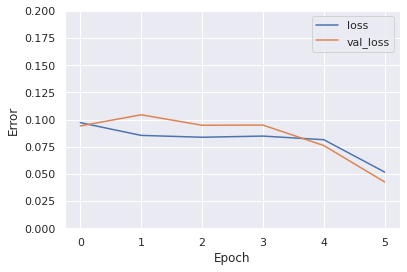

In [ ]:
plot_loss(history)

In [ ]:
#albert_regression_model_mae.save_pretrained("/Regression/Finetuned_Albert_model_MAE")

Save the Trained Model In Google Drive

In [ ]:
albert_regression_model_mae.save_pretrained("/content/drive/MyDrive/Data Science Project/Datasets/ISEAR/Finetuned_Albert_model_MAE")

Load the Trained Model from Google Drive

In [ ]:
#loaded_model = TFAlbertForSequenceClassification.from_pretrained("/Regression/Finetuned_Albert_model_MAE")
loaded_model = TFAlbertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Data Science Project/Datasets/ISEAR/Finetuned_Albert_model_MAE")

Some weights of the model checkpoint at /content/drive/MyDrive/Data Science Project/Datasets/ISEAR/Finetuned_Albert_model_MAE were not used when initializing TFAlbertForSequenceClassification: ['dropout_5']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFAlbertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Data Science Project/Datasets/ISEAR/Finetuned_Albert_model_MAE and are newly initialized: ['dropout_11']
You should probably TRAIN this model on a down-stream task to be

Testset Predictions

In [ ]:
test_pred = []


for sent in test_data:
  test_tokens = albert_tokens.encode(sent,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

  test_pred.append(loaded_model.predict(test_tokens)[0][0][0])
print(test_pred)

[0.6660437, 0.5907657, 0.8640741, 0.53952676, 0.43848106, 0.46810433, 0.72290593, 0.2717524, 0.116924904, 0.85259503, 0.02669745, 0.032803662, 0.59392273, 0.6346385, 0.61738956, 0.41741097, 0.025052164, 0.07558719, 0.20799117, 0.4485683, 0.34144536, 0.041572962, 0.081426784, 0.74137044, 0.7394529, 0.027297031, 0.030166265, 0.63394296, 0.025592986, 0.7466183, 1.0061343, 0.6160474, 0.95582247, 0.15382761, 0.4717739, 0.024209931, 0.36850744, 0.5142045, 0.16924736, 0.5697025, 0.035531446, 0.45388862, 1.0115789, 0.02714651, 0.03569763, 0.72785085, 0.44500718, 0.39125252, 0.026838224, 0.30646476, 0.45583785, 0.025114555, 0.08294051, 0.18100862, 0.9998734, 0.31367794, 0.6218896, 0.94999737, 0.843688, 0.29208252, 0.031138483, 0.54669344, 0.26398245, 0.32838914, 0.17947258, 1.0292476, 0.08429376, 0.027043626, 0.5965065, 0.46937397, 0.109961785, 0.56658375, 0.037092865, 0.7908044, 0.51598483, 0.6053468, 1.0212102, 0.49710935, 0.50444365, 0.22570664, 0.7867201, 0.9894707, 0.042432375, 0.48431623,

MSE for Test Set

In [ ]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(test_scores, test_pred)
print(mse_test)

0.015874731270999518


MAE for Test Set

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(test_scores, test_pred)
print(mae_test)

0.07793481353382972


RMSE for Test Set

In [ ]:
root_mean_squared_error_test = math.sqrt(mse_test)
print(root_mean_squared_error_test)

0.1259949652605195


In [ ]:
# sentences_list = data_frame["Sentence"].tolist()

# Class_0_Preds = []
# Class_1_Preds = []
# Class_2_Preds = []
# Class_3_Preds = []
# Class_4_Preds = []
# Class_5_Preds = []
# Class_6_Preds = []

# for sent in sentences_list:
#   predict_input = tokenizer.encode(sent,
#                                    truncation=True,
#                                    padding=True,
#                                    return_tensors="tf")
#   tf_output = loaded_model.predict(predict_input)[0]

#   Class_0_Preds.append(tf_output[0][0])
#   Class_1_Preds.append(tf_output[0][1])
#   Class_2_Preds.append(tf_output[0][2])
#   Class_3_Preds.append(tf_output[0][3])
#   Class_4_Preds.append(tf_output[0][4])
#   Class_5_Preds.append(tf_output[0][5])
#   Class_6_Preds.append(tf_output[0][6])




In [ ]:
# df = DataFrame({'Class_0':Class_0_Preds, 'Class_1':Class_1_Preds, 'Class_2':Class_2_Preds, 'Class_3':Class_3_Preds, 'Class_4':Class_4_Preds, 'Class_5':Class_5_Preds, 'Class_6':Class_6_Preds})

In [ ]:
# len(df)

In [ ]:
# from textblob import TextBlob

# def getScore(data):
#   return TextBlob(data).sentiment.subjectivity

# df["Subj_Score"] = data_frame["Sentence"].apply(getScore)

In [ ]:
# df.head()

In [ ]:
# X = df.iloc[:, 0:7].values
# y = df.iloc[:, 7].values

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
# print(y)

Ref: https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/

In [ ]:
# from tensorflow.keras.layers import Input, Dense, Activation,Dropout
# from tensorflow.keras.models import Model

# input_layer = Input(shape=(X.shape[1],))
# dense_layer_1 = Dense(100, activation='relu')(input_layer)
# dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
# dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
# output = Dense(1)(dense_layer_3)

# model = Model(inputs=input_layer, outputs=output)
# model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
# history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

References:

1. TensorFlow  Datasets,  A  collection  of  ready-to-use  datasets.https://www.tensorflow.org/datasets.64

2. Source code for transformers.models.albert.tokenizationalbert. Accessed: 2021-03-14.url:https://huggingface.co/transformers/_modules/transformers/models/albert/tokenization_albert.html#AlbertTokenizer.

3. Source code for transformers.models.albert.modelingtfalbert. Accessed: 2021-03-14.url:https://huggingface.co/transformers/_modules/transformers/models/albert/modeling_tf_albert.html#TFAlbertForSequenceClassification.

4. Huggingface Distilbert - https://colab.research.google.com/drive/1yi9N-ZnQHtYfR3QDiwsPxYCYU6WyjwlQ#scrollTo=633fetsKg5cv

5. Huggingface  ALBERT  pre-trained  Model. Accessed: 2021-03-14.url:https://huggingface.co/albert-base-v2/resolve/main/spiece.model.

6. Huggingface  ALBERT  Base  version  2  Model  Usage.  Accessed:  2021-03-14.url: https://huggingface.co/albert-base-v2.